In [2]:
'''
In this notebook, we are going to segment customers based on their income and spending habits using K-means clustering.
We will begin with data cleaning and validation, Preprocessiing and then we will apply K-means clustering.
'''

'\nIn this notebook, we are going to segment customers based on their spending habits using K-means clustering.\nWe will begin with data cleaning and validation, Preprocessiing and then we will apply K-means clustering.\n'

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [3]:
mall = pd.read_csv('Mall_Customers.csv')

#check the data
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


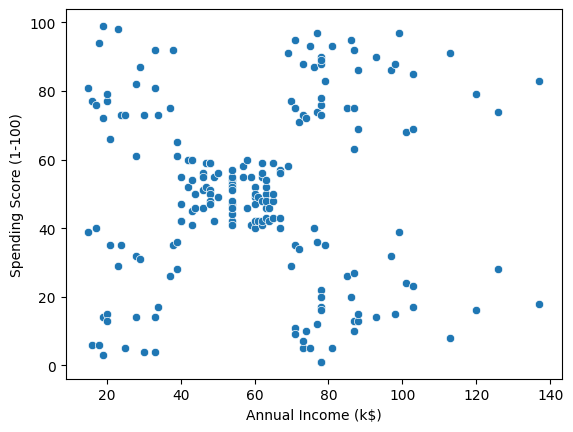

In [16]:
#visualize the data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall)

#show the plot
plt.show()

In [24]:
'''
From the above data let's make an educated guess on the number of clusters we should use.
We will then fit the K-means model and predict the results.
We also see that our values are all on the same scale so we don't need to apply scaling.
'''

"\nFrom the above data let's make an educated guess on the number of clusters we should use.\nWe will then fit the K-means model and predict the results.\nWe also see that our values are all on the same scale so we don't need to apply scaling.\n"

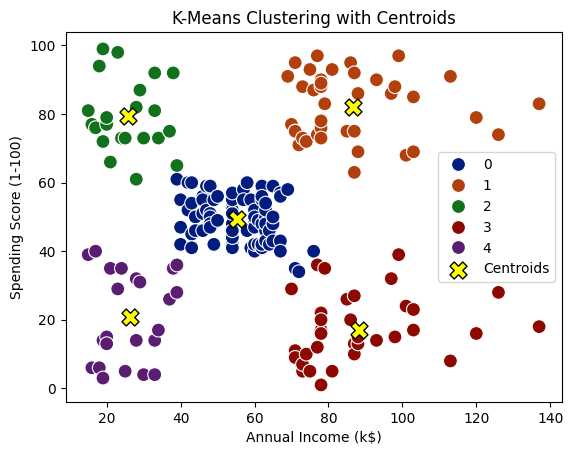

In [27]:
# Instantiate K-means
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])

# Predict the clusters
mall['cluster'] = kmeans.predict(mall[['Annual Income (k$)', 'Spending Score (1-100)']])

# Get the centroids from the model
centroids = kmeans.cluster_centers_

# Scatter plot of the data points colored by their clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='dark', data=mall, s=100)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='yellow', marker='X', edgecolor='black', label='Centroids')

# Add labels, title, and legend
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Show the plot
plt.show()


In [29]:
'''
we have plot our graph and have seen the centroids for each cluster.
We will find the optimal number of clusters using the elbow method using
Within Cluster Sum of Squares (WCSS) and the silhouette score.
'''

'\nwe have plot our graph and have seen the centroids for each cluster.\nWe will find the optimal number of clusters using the elbow method using \nWithin Cluster Sum of Squares (WCSS) and the silhouette score.\n'

In [30]:
#instantiate empty list
wcsse =[]

#define range
num_clusters = range(1,11)

#loop through the range
for i in num_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])

    #append to the empty list
    wcsse.append(kmeans.inertia_)

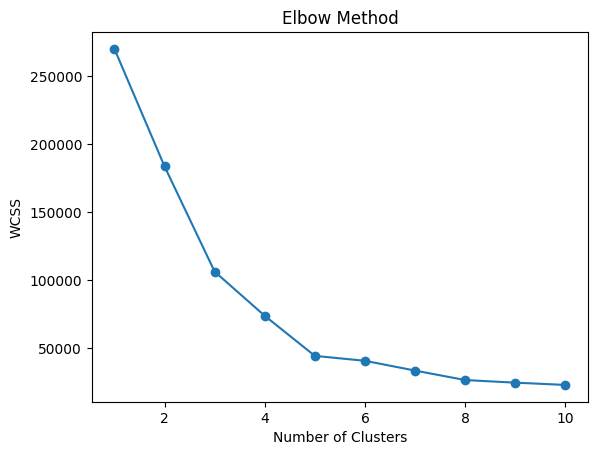

In [31]:
#visualize the elbow
plt.plot(num_clusters, wcsse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
'''
From the above visualization, we see the elbow of the line plot falls on 5 hence we have our optimal number of clusters to
be 5.
We will also used silhouette score to find the optimal number of clusters.
'''

'\nFrom the above visualization, we see the elbow of the line plot falls on 5 hence we have our optimal number of clusters to \nbe 5.\nWe will also used silhouette score to find the optimal number of clusters.\n'

In [35]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(mall[['Annual Income (k$)', 'Spending Score (1-100)']])
    silhouette_scores.append(silhouette_score(mall[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_))

silhouette_scores

[0.3774913479961559,
 0.46761358158775435,
 0.41508307009338524,
 0.553931997444648,
 0.5375812731362782,
 0.45611379440879946,
 0.42171151217040276,
 0.4242794142604815,
 0.42592552293286245]

In [36]:
'''
From the given array above the highest silhoutte score is 0.55 which corresponds to 5 number of clusters
'''

'\nFrom the given array above the highest silhoutte score is 0.55 which corresponds to 5 number of clusters\n'

In [32]:
#end of notebook